In [25]:
import shutil, os
import pandas as pd
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor # In order to convert the datat to pytorch tensors
from torchvision.transforms import Resize
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download dog-breed-identification

100% 688M/691M [00:07<00:00, 88.4MB/s]
100% 691M/691M [00:07<00:00, 94.1MB/s]


In [7]:
! unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [8]:
import pandas as pd
import os, random, cv2

# Let's check the labels
labels_df = pd.read_csv("/content/labels.csv")
labels_df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
import shutil, os
import pandas as pd

labels = pd.read_csv("/content/labels.csv")
labels = labels.sort_values('breed')

In [10]:
class_names = list(labels.breed.unique())

In [11]:
class_names = class_names[:5]

In [12]:
class_names.append('maltese_dog')

In [13]:
class_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'maltese_dog']

In [14]:
train_images = '/content/train'
train_cat = '/content/test'

In [15]:
train_files = os.listdir("/content/train")
len(train_files)

10222

In [16]:
test_files = os.listdir("/content/test")
len(test_files)

10357

In [17]:
train_cat

'/content/test'

In [18]:
#creating subfolders
for i in class_names:
    os.makedirs(os.path.join('/content/sub_f', i))

In [19]:
#creating subfolders
#for i in class_names:
#    os.makedirs(os.path.join('/content/test_f', i))

In [20]:
class_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'maltese_dog']

In [21]:
#moving the image files to their respective categories
# /content/train/000bec180eb18c7604dcecc8fe0dba07.jpg
for c in class_names: # Category Name
    print(c)
    for i in list(labels[labels['breed']==c]['id']): # Image Id
        print(i)
        get_image = os.path.join('/content/train/', i +'.jpg') # Path to Images 
        move_image_to_cat = shutil.move(get_image, '/content/sub_f/' + c)

affenpinscher
1ee0c041d15647e3909625eba419f153
5a533f3bae76091d6866fa60ba2ec9d4
5b154e409fe61a86f37e842480f44a10
5cb8e8855145375221015c02fe21b273
c32fb0c78bfc35f176ae7090155ef2c9
5cdfe257b5fd7f189e724c8f54ff4bbd
c14d79e9e4e88583fcb603aad4ca2493
bb724c8973031fa308fdfe81183c1ede
0484a6cc686a07e1edacd0fb44b1d965
b957aa0e8dc0628b09708213e9640a2f
5ed432dc19e835ecacfbeea92c7cfc83
18b4e732c105272f40956c2f85813bcb
b2ecb9fc9cfb36041e60d03f44fc181d
19a8c1698819d382c3ead14bdc1a360b
19de1db12b3ddc7f2af6d9453c977083
1a012faf98b32039adc17ee708bcb360
32249ae4f7590aede350e2b08b322ac4
b03a73190ffd9c423257b94927599460
1aa98488ce65f9b57b468ccde4f1cad8
acf27cad5544fbed6baa345666f87700
aa66749e1fef393bd14b27e0e305b82a
fb56acfbe4b95a0df7a4b9e6bddbafd0
fbb02fe9f6a18d5e59c93e957dccf4fb
a7b2a87a394fd17c848d2bf21cb7fe59
a694bb8740fe5042c5d1b1a19445a250
6771e15f52bf889dd309f013710995e4
11b60d8d86f14a601ca290909a17cbc6
a2702282275212144b1683a434651d7f
10edc6f98c2423e4e195e09a86b0d292
cf6e0ec97666cf8ddc3de90f1273f

In [22]:

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor # In order to convert the datat to pytorch tensors
from torchvision.transforms import Resize
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

trans_comp = T.Compose([
  T.Resize([256,256]),
  T.ToTensor()
])

dataset = ImageFolder("/content/sub_f", transform=trans_comp) 

In [23]:
dataset # check specs of dataset.

Dataset ImageFolder
    Number of datapoints: 580
    Root location: /content/sub_f
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
img, label = dataset[2] # img shape = torch.Size([3, 338, 450]) , label will be value [0,119] 120 classes.
img # What each image in tensorial notation looks like.

tensor([[[0.0980, 0.1137, 0.1255,  ..., 0.2549, 0.1804, 0.1373],
         [0.1373, 0.1333, 0.1294,  ..., 0.2157, 0.1529, 0.0980],
         [0.1490, 0.1333, 0.1176,  ..., 0.2275, 0.2000, 0.1608],
         ...,
         [0.3059, 0.3451, 0.5176,  ..., 0.9451, 0.9569, 0.9490],
         [0.3098, 0.3686, 0.5412,  ..., 0.9529, 0.9647, 0.9529],
         [0.3137, 0.3922, 0.5569,  ..., 0.9490, 0.9647, 0.9490]],

        [[0.1294, 0.1451, 0.1569,  ..., 0.2980, 0.2275, 0.1804],
         [0.1686, 0.1647, 0.1608,  ..., 0.2588, 0.1961, 0.1412],
         [0.1804, 0.1647, 0.1490,  ..., 0.2745, 0.2431, 0.2039],
         ...,
         [0.3608, 0.4000, 0.5647,  ..., 0.9882, 0.9961, 0.9843],
         [0.3647, 0.4235, 0.5882,  ..., 0.9922, 1.0000, 0.9882],
         [0.3686, 0.4431, 0.6039,  ..., 0.9882, 1.0000, 0.9843]],

        [[0.1412, 0.1569, 0.1686,  ..., 0.2980, 0.2314, 0.1922],
         [0.1804, 0.1765, 0.1725,  ..., 0.2588, 0.2000, 0.1569],
         [0.1922, 0.1765, 0.1608,  ..., 0.2706, 0.2471, 0.

In [ ]:
dataset.classes # list of 120 classes with numeric labels, affenpinscher = 0 ; afghan_hound = 1 ,... etc.

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'maltese_dog']

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0)) # The channels should br placed at last.

Label:  maltese_dog (5)


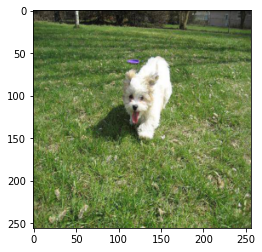

In [ ]:
show_example(*dataset[480])

Label:  afghan_hound (1)


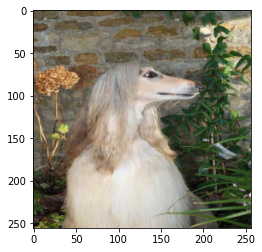

In [ ]:
show_example(*dataset[109])

Model pipeline start

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split


In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);
val_size = 10
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(570, 10)

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=5 

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [ ]:
show_batch(train_dl)

In [ ]:
# kernel implimentation from standard pytorch example.

def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
# example 
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

Object `F` not found.


In [ ]:
# For each kernel we have 1 matrix (i.e 1 channel of the output)
# Hence, we can convert the image to arbitrary number of channels.
# multiple kernels actually find different patterns (e.g. ears, nose etc.) it will do on its own.

simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), # input channel = 3 (RBG), number of kernels = 8 (output channels)
    nn.MaxPool2d(4, 4)
)

# We are going for 8 kernels, as 8 is a good number for CNN , usually images distinction can be made with 8 features.

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape) # images.shape: torch.Size([128, 3, 256, 256]) 128 = batch size
    out = simple_model(images)
    print('out.shape:', out.shape) # out.shape: torch.Size([128, 8, 128, 128]) (the last 2Ds got halved due to the pooling)
    break

images.shape: torch.Size([5, 3, 256, 256])
out.shape: torch.Size([5, 8, 64, 64])


In [ ]:
# Standar pytorch tutorial

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# Model based on ImageClassificationBase class

class Classifier_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128 

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 256 x 16 x 16

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 512 x 4 x 4

            nn.Flatten(), # Flatten out 512 x 4 x 4 to 512*4*4
            nn.Linear(512*4*4, 1024*2), # 256*4*4 input to 1024 output
            nn.ReLU(),
            nn.Linear(1024*2, 1024), # 1024 input to 512 output
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256), # 1024 input to 256 output
            nn.ReLU(),
            nn.Linear(256, 6)) # 120 final outputs
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
len(dataset.classes)

6

In [ ]:
model = Classifier_model()
model

In [ ]:
model = Classifier_model()
model

# Check the model functioning of image reduction.
# A single multi channel image now gives the output of probabilities in 120 separate classes.
# The result is at the moment random.

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape: torch.Size([5, 3, 256, 256])
out.shape: torch.Size([5, 6])
out[0]: tensor([-0.0058, -0.0346, -0.0332, -0.0449,  0.0361,  0.0075],
       grad_fn=<SelectBackward0>)


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [ ]:
device = get_default_device() 
device # device(type='cuda') , enable it from the runtime.

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [ ]:
model = to_device(Classifier_model(), device)

In [ ]:
len(train_dl)

114

In [ ]:
evaluate(model, val_dl)

{'val_loss': 1.792327642440796, 'val_acc': 0.20000000298023224}

In [ ]:
num_epochs = 50
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.1638, val_loss: 11.8181, val_acc: 0.2000
Epoch [1], train_loss: 0.0566, val_loss: 10.4167, val_acc: 0.2000
Epoch [2], train_loss: 0.0006, val_loss: 9.9476, val_acc: 0.2000
Epoch [3], train_loss: 0.0001, val_loss: 9.8472, val_acc: 0.3000
Epoch [4], train_loss: 0.0001, val_loss: 9.8647, val_acc: 0.3000
Epoch [5], train_loss: 0.0001, val_loss: 9.9828, val_acc: 0.3000
Epoch [6], train_loss: 0.0000, val_loss: 10.2639, val_acc: 0.3000
Epoch [7], train_loss: 0.0000, val_loss: 10.8266, val_acc: 0.2000
Epoch [8], train_loss: 0.0000, val_loss: 11.1887, val_acc: 0.2000
Epoch [9], train_loss: 0.0000, val_loss: 11.4660, val_acc: 0.2000
Epoch [10], train_loss: 0.0000, val_loss: 11.7479, val_acc: 0.3000
Epoch [11], train_loss: 0.0000, val_loss: 12.6135, val_acc: 0.2000
Epoch [12], train_loss: 0.0000, val_loss: 12.5953, val_acc: 0.2000
Epoch [13], train_loss: 0.0000, val_loss: 12.9134, val_acc: 0.2000
Epoch [14], train_loss: 0.0000, val_loss: 13.0858, val_acc: 0.3000
Epoch [15

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

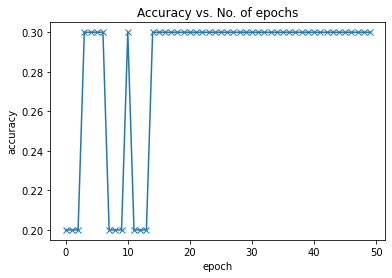

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

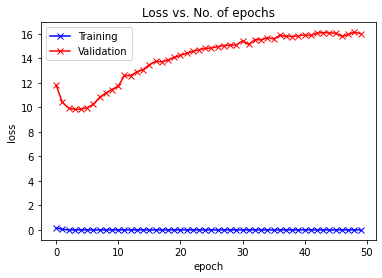

In [ ]:
plot_losses(history)

**Testing with individual images**

In [ ]:
import torch
from PIL import Image
import numpy as np

# Load the image and resize it to 256x256
image = Image.open('/content/shi.jpeg').resize((256, 256))
# Convert the image to a tensor
tensor_test = torch.tensor(np.array(image))
# Normalize the tensor values to be between 0 and 1
tensor_test = tensor_test.float() / 255.0

# Reshape the tensor to have a batch size of 1
tensor_test = tensor_test.permute(2, 0, 1).unsqueeze(0)


In [ ]:
tensor_test.shape

torch.Size([1, 3, 256, 256])

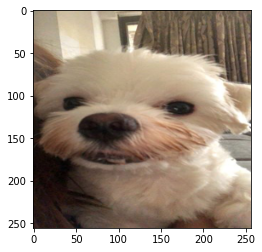

In [ ]:
plt.imshow(tensor_test[0].permute(1, 2, 0))

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: maltese_dog , Predicted: airedale


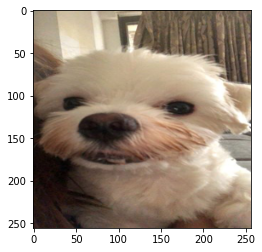

In [ ]:
img = tensor_test
label = 'maltese_dog'
plt.imshow(img[0].permute(1, 2, 0))

print('Label:', 'maltese_dog' , ', Predicted:', predict_image(img[0], model))

But this doesn't seem to be correct!

**let's see if adding a pretext task helps or not!**

In [9]:
#creating subfolders 
os.makedirs(os.path.join('/content/unsup_f_star2'))

In [10]:
#creating subfolders 
os.makedirs(os.path.join('/content/unsup_f_star2/subf'))

In [15]:
! unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [17]:
import os, random, cv2
import os, random, cv2

# Let's check the labels
labels_df = pd.read_csv("/content/labels.csv")
labels_df.head()

import shutil, os
import pandas as pd

labels = pd.read_csv("/content/labels.csv")
labels = labels.sort_values('breed')

class_names = list(labels.breed.unique())

In [18]:
labels = list(labels_df.id)

In [19]:
for i in labels: # Image Id
    get_image = os.path.join('/content/train/', i +'.jpg') # Path to Images 
    move_image_to_cat = shutil.move(get_image, '/content/unsup_f_star2/subf')

In [20]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

In [21]:
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

trans_comp = T.Compose([
  T.Resize([256,256]),
  T.ToTensor()
])

dataset = ImageFolder("/content/unsup_f_star2", transform=trans_comp) 

In [22]:
import torch
import torchvision.transforms.functional as Fun
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

import torch.nn as nn
import torch.nn.functional as F

class RotationDataset(Dataset):
    def __init__(self, dataset, degrees):
        self.dataset = dataset
        self.degrees = degrees

    def __len__(self):
        return len(self.dataset) * len(self.degrees)

    def __getitem__(self, index):
        img_index = index // len(self.degrees)
        img, _ = self.dataset[img_index]
        degree_index = index % len(self.degrees)
        degree = self.degrees[degree_index]
        rotated_img = Fun.rotate(img, degree)
        label = torch.tensor(degree_index)
        return rotated_img, label

trans_comp = T.Compose([
  T.Resize([256,256]),
  T.ToTensor()
])

unlabelled_dataset = ImageFolder(root='/content/unsup_f_star2', transform=trans_comp)

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

Label:  subf (0)
torch.Size([3, 256, 256])


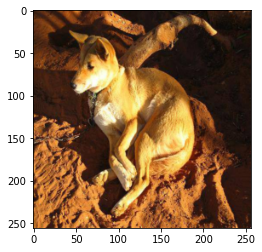

In [24]:
def show_example(img, label):
    print('Label: ', unlabelled_dataset.classes[label], "("+str(label)+")")
    print(img.shape)
    plt.imshow(img.permute(1, 2, 0)) # The channels should br placed at last.
  
show_example(*unlabelled_dataset[1])

In [25]:
degrees = [0, 90, 180, 270]
rotated_dataset = RotationDataset(unlabelled_dataset, degrees)

In [26]:
dataloader = DataLoader(rotated_dataset, batch_size=1, shuffle=True)

In [27]:
dataloader

In [28]:
#creating subfolders 
os.makedirs(os.path.join('/content/super_star'))

In [29]:
class_names = ['0','1','2','3']

#creating subfolders
for i in class_names:
    os.makedirs(os.path.join('/content/super_star', i))

In [30]:
labels = list(labels_df.id)

In [31]:
class_names = ['0','1','2','3']
class_names[0]

'0'

In [32]:
import shutil
import os
import cv2
import os

# Initialize your DataLoader

from google.colab import drive 
drive.mount('/content/drive')

# Set your target directory
#target_directory = "/content/unsup_f2"

# Iterate over the images in your dataloader
i = 0
for image, labels in (dataloader):
    #print(image)
    j = (str(labels.item()))
    i1 = str(i)
    transform = T.ToPILImage()
    image = transform(image[0])
    
    #cv2.imwrite(file_path, image)
    folder_path = "/content/super_star/"+j
    file_name = i1+'.jpg'
    file_path = os.path.join(folder_path, file_name)
    #print(file_path)
    image.save(file_path)
    # Construct your target file path
    #target_file_path = os.path.join(target_directory, f"image_{i}.jpg")
    
    # Save the image to the target directory
    i = i+1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor # In order to convert the datat to pytorch tensors
from torchvision.transforms import Resize
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

trans_comp = T.Compose([
  T.Resize([256,256]),
  T.ToTensor()
])

dataset_rot = ImageFolder("/content/super_star", transform=trans_comp) 

Label:  0 (0)
torch.Size([3, 256, 256])


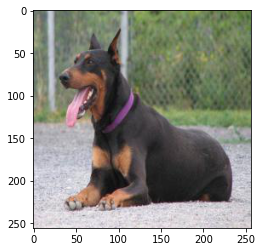

In [34]:
def show_example(img, label):
    print('Label: ', dataset_rot.classes[label], "("+str(label)+")")
    print(img.shape)
    plt.imshow(img.permute(1, 2, 0)) # The channels should br placed at last.
  
show_example(*dataset_rot[1])

In [35]:
dataset_rot.classes

['0', '1', '2', '3']

In [36]:
from torchvision.utils import make_grid
from torch.utils.data import random_split

val_size = 1000
train_size = len(dataset_rot) - val_size

train_ds, val_ds = random_split(dataset_rot, [train_size, val_size])
len(train_ds), len(val_ds)

(39888, 1000)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


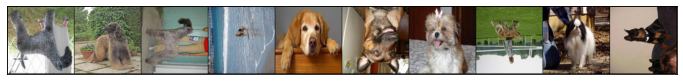

In [37]:
from torch.utils.data.dataloader import DataLoader

batch_size=10 

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
        
show_batch(train_dl)

In [38]:
# Standar pytorch tutorial

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
# Model based on ImageClassificationBase class
class Classifier_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128 

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 256 x 16 x 16

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 512 x 4 x 4

            nn.Flatten()) # Flatten out 512 x 4 x 4 to 512*4*4


        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024*2), # 256*4*4 input to 1024 output
            nn.ReLU(),
            nn.Linear(1024*2, 1024), # 1024 input to 512 output
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256), # 1024 input to 256 output
            nn.ReLU(),
            nn.Linear(256, 4)) # 4 final output classes (0,90,180,270)
        
    def forward(self, xb):
        x = self.network(xb)
        return self.fc(x)

In [40]:
model = Classifier_model()
model

Classifier_model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride

In [41]:
# Check the model functioning of image reduction.
# A single multi channel image now gives the output of probabilities in 120 separate classes.
# The result is at the moment random.

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([10, 3, 256, 256])
out.shape: torch.Size([10, 4])
out[0]: tensor([ 0.0179,  0.0250, -0.0207,  0.0351], grad_fn=<SelectBackward0>)


In [42]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device() 
device # device(type='cuda') , enable it from the runtime.

train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [43]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [44]:
model = to_device(Classifier_model(), device)

evaluate(model, val_dl)

{'val_loss': 1.3845548629760742, 'val_acc': 0.27000001072883606}

In [45]:
len(val_dl)

100

In [47]:
num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.0001

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.3864, val_loss: 1.3865, val_acc: 0.2440
Epoch [1], train_loss: 1.3864, val_loss: 1.3864, val_acc: 0.2200
Epoch [2], train_loss: 1.3388, val_loss: 1.1610, val_acc: 0.4370
Epoch [3], train_loss: 1.0253, val_loss: 0.7947, val_acc: 0.6810
Epoch [4], train_loss: 0.6988, val_loss: 0.5913, val_acc: 0.7720


**Save the best model**

In [48]:
import time
import os
import copy

param_save = model.parameters
best_model_wts = copy.deepcopy(model.state_dict())

torch.save(model.state_dict(), 'model_weights.pth')

In [51]:
best_model_wts

OrderedDict([('network.0.weight',
              tensor([[[[-1.7677e-01, -5.5842e-02, -8.1193e-03],
                        [-1.0037e-01, -1.8293e-01, -9.9665e-02],
                        [-1.5454e-01,  1.2426e-01,  1.5262e-01]],
              
                       [[ 1.4675e-01,  1.3388e-01, -1.7407e-01],
                        [-4.8207e-04,  1.4535e-01, -2.2560e-02],
                        [ 1.3562e-01,  1.2424e-01,  1.4422e-01]],
              
                       [[-9.5452e-02, -7.5769e-03, -1.1301e-01],
                        [ 6.1950e-02, -8.3991e-02,  7.7695e-02],
                        [ 2.3649e-02,  4.4158e-02,  8.5759e-02]]],
              
              
                      [[[-8.4388e-02, -2.1402e-02, -2.6389e-02],
                        [-4.9887e-02,  1.8904e-01,  1.0466e-01],
                        [-1.2966e-01,  1.6543e-01,  1.4483e-02]],
              
                       [[ 1.7411e-01,  1.1663e-01,  8.4616e-03],
                        [-1.8044e-01,  6.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

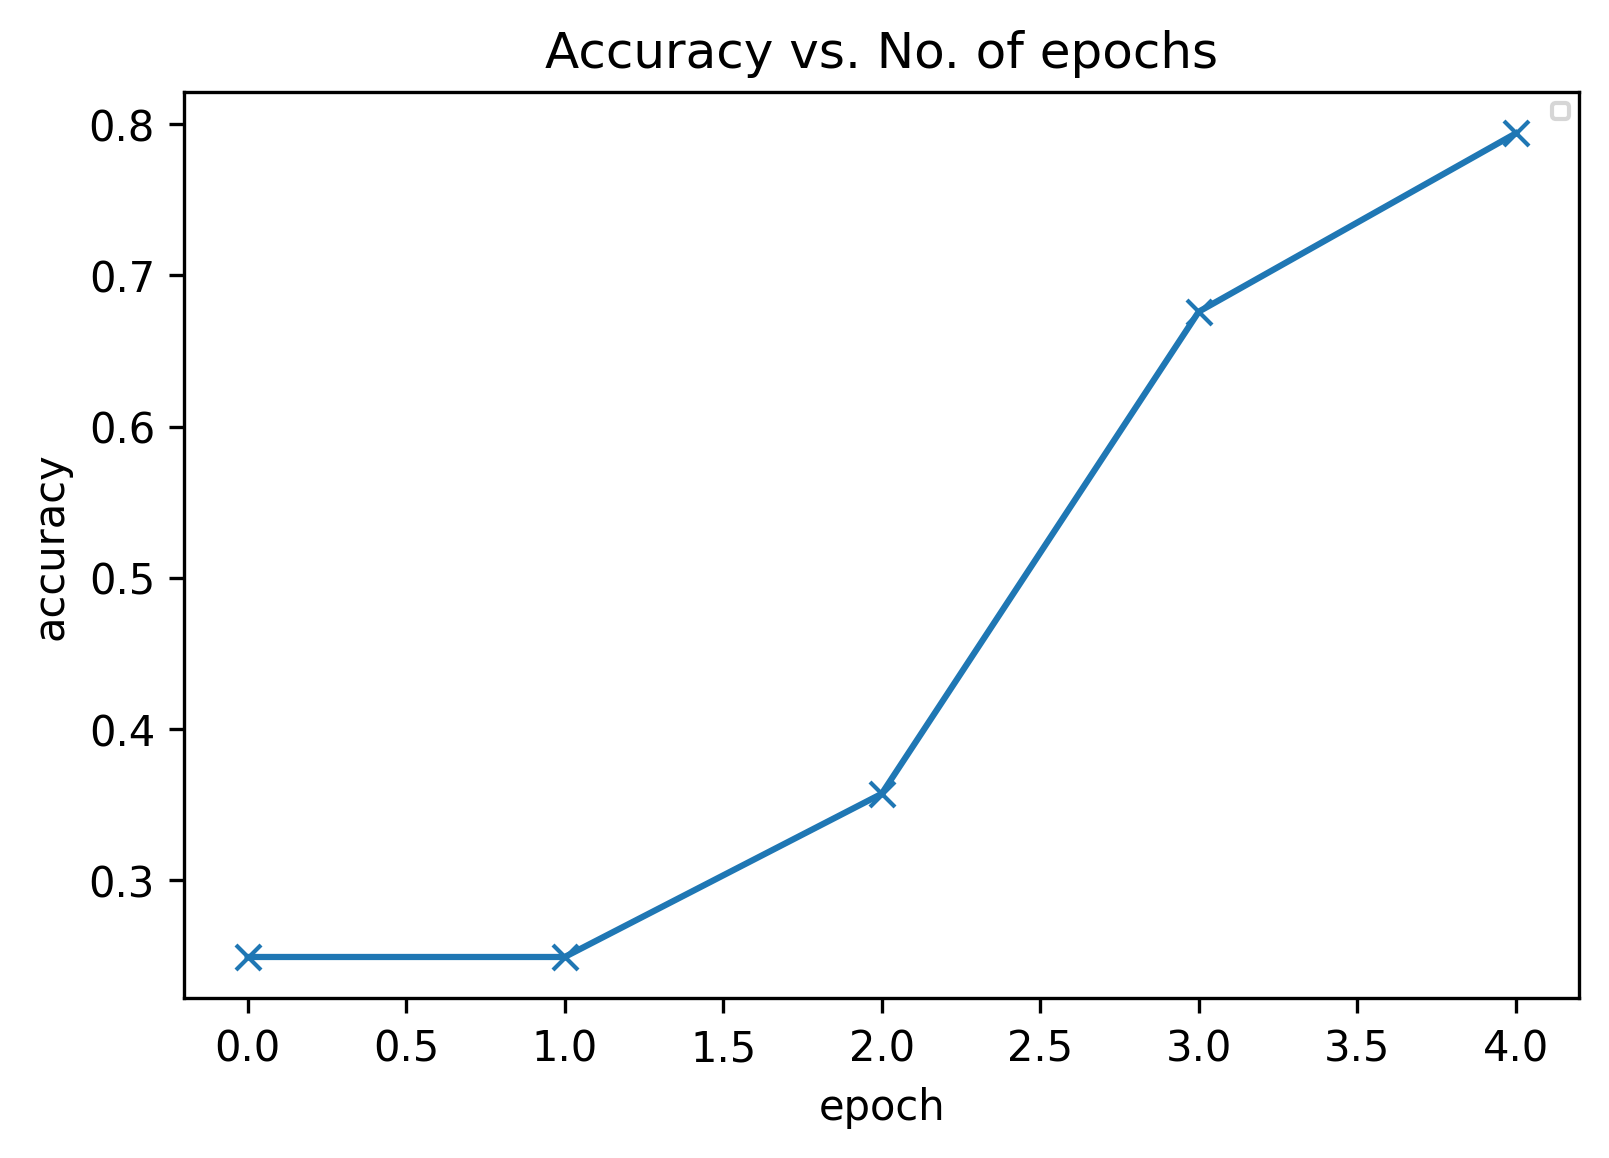

In [ ]:

plot_accuracies(history)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5})

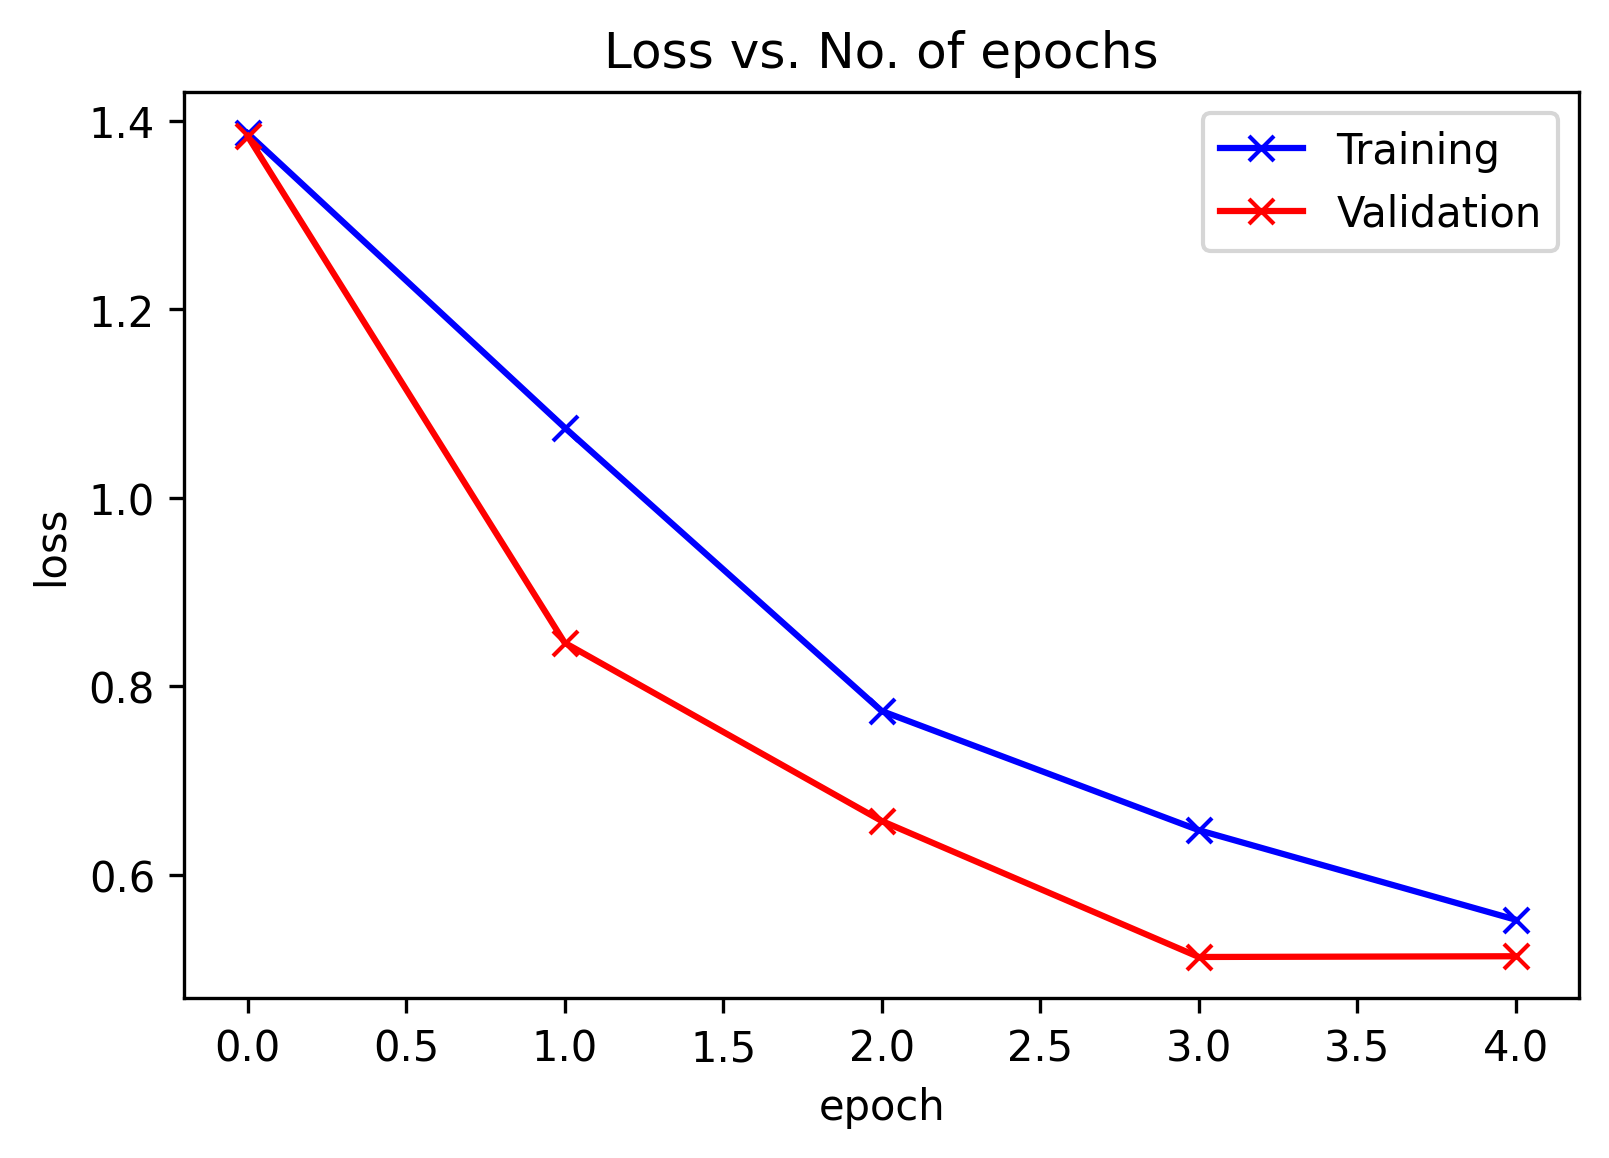

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

#**Move to downstream task**.

In [49]:
! unzip dog-breed-identification.zip

import pandas as pd
import os, random, cv2

# Let's check the labels
labels_df = pd.read_csv("/content/labels.csv")
labels_df.head()

import shutil, os
import pandas as pd

labels = pd.read_csv("/content/labels.csv")
labels = labels.sort_values('breed')

class_names = list(labels.breed.unique())
class_names = class_names[:5]
class_names.append('maltese_dog')

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [98]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor # In order to convert the datat to pytorch tensors
from torchvision.transforms import Resize
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

trans_comp = T.Compose([
  T.Resize([256,256]),
  T.ToTensor()
])

dataset = ImageFolder("/content/sub_f", transform=trans_comp) 

In [99]:
random_seed = 42
torch.manual_seed(random_seed);
val_size = 10
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

from torch.utils.data.dataloader import DataLoader

batch_size=5 

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

In [100]:
# Standar pytorch tutorial

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [101]:
# Model based on ImageClassificationBase class
class Classifier_model_downstream(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128 

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 256 x 16 x 16

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 512 x 4 x 4

            nn.Flatten()) # Flatten out 512 x 4 x 4 to 512*4*4


        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024*2), # 256*4*4 input to 1024 output
            nn.ReLU(),
            nn.Linear(1024*2, 6)) # 1024 input to 512 output
        
    def forward(self, xb):
        x = self.network(xb)
        return self.fc(x)

In [102]:
model = Classifier_model_downstream()
model

Classifier_model_downstream(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3,

In [103]:
# Check the model functioning of image reduction.
# A single multi channel image now gives the output of probabilities in 120 separate classes.
# The result is at the moment random.

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break


images.shape: torch.Size([5, 3, 256, 256])
out.shape: torch.Size([5, 6])
out[0]: tensor([ 0.0129,  0.0130,  0.0236, -0.0035,  0.0172,  0.0033],
       grad_fn=<SelectBackward0>)


In [104]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device() 
device # device(type='cuda') , enable it from the runtime.

train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [105]:
to_device(model, device);
model

Classifier_model_downstream(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3,

In [106]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [107]:
model = to_device(Classifier_model_downstream(), device)

In [108]:
device

device(type='cuda')

In [109]:
# Load the saved weights from the trained model
trained_model_path = "/content/model_weights.pth"
trained_model_state_dict = torch.load(trained_model_path)

# Create the new model
new_model = to_device(Classifier_model_downstream(), device)

# Remove the keys corresponding to the layers that you don't want to initialize
new_model_state_dict = new_model.state_dict()
for key in list(new_model_state_dict.keys()):
    if key.startswith('fc'):
         new_model_state_dict[key]

# Update the state dictionary with the learned weights
trained_model_state_dict.update(new_model_state_dict)

new_model.load_state_dict(trained_model_state_dict)

RuntimeError: ignored

In [110]:
# Load the saved weights from the trained model
trained_model_path = "/content/model_weights.pth"
trained_model_state_dict = torch.load(trained_model_path)

# Create the new model
new_model = to_device(Classifier_model_downstream(), device)

In [111]:
device

device(type='cuda')

In [112]:
trained = torch.load(trained_model_path) # change 'cpu' to device if gpu.
trained_trim = {k:v for k, v in trained.items() if not k.startswith('fc')}

In [113]:
new_model.load_state_dict(trained_trim , strict=False)

_IncompatibleKeys(missing_keys=['fc.0.weight', 'fc.0.bias', 'fc.2.weight', 'fc.2.bias'], unexpected_keys=[])

In [114]:
evaluate(new_model, val_dl)

{'val_loss': 1.7850148677825928, 'val_acc': 0.20000000298023224}

In [116]:
num_epochs = 50
opt_func = torch.optim.Adam
lr = 0.0001

history = fit(num_epochs, lr, new_model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.1965, val_loss: 6.4278, val_acc: 0.4000
Epoch [1], train_loss: 0.0102, val_loss: 6.7527, val_acc: 0.4000
Epoch [2], train_loss: 0.0005, val_loss: 6.7330, val_acc: 0.4000
Epoch [3], train_loss: 0.0002, val_loss: 6.9085, val_acc: 0.4000
Epoch [4], train_loss: 0.0001, val_loss: 6.9464, val_acc: 0.4000
Epoch [5], train_loss: 0.0001, val_loss: 7.0666, val_acc: 0.4000
Epoch [6], train_loss: 0.0001, val_loss: 7.2122, val_acc: 0.4000
Epoch [7], train_loss: 0.0000, val_loss: 7.2848, val_acc: 0.4000
Epoch [8], train_loss: 0.0000, val_loss: 7.3757, val_acc: 0.4000
Epoch [9], train_loss: 0.0000, val_loss: 7.5461, val_acc: 0.4000
Epoch [10], train_loss: 0.0000, val_loss: 7.6870, val_acc: 0.4000
Epoch [11], train_loss: 0.0000, val_loss: 7.6127, val_acc: 0.4000
Epoch [12], train_loss: 0.0000, val_loss: 7.7181, val_acc: 0.4000
Epoch [13], train_loss: 0.0000, val_loss: 7.8199, val_acc: 0.4000
Epoch [14], train_loss: 0.0000, val_loss: 7.7567, val_acc: 0.4000
Epoch [15], train_lo

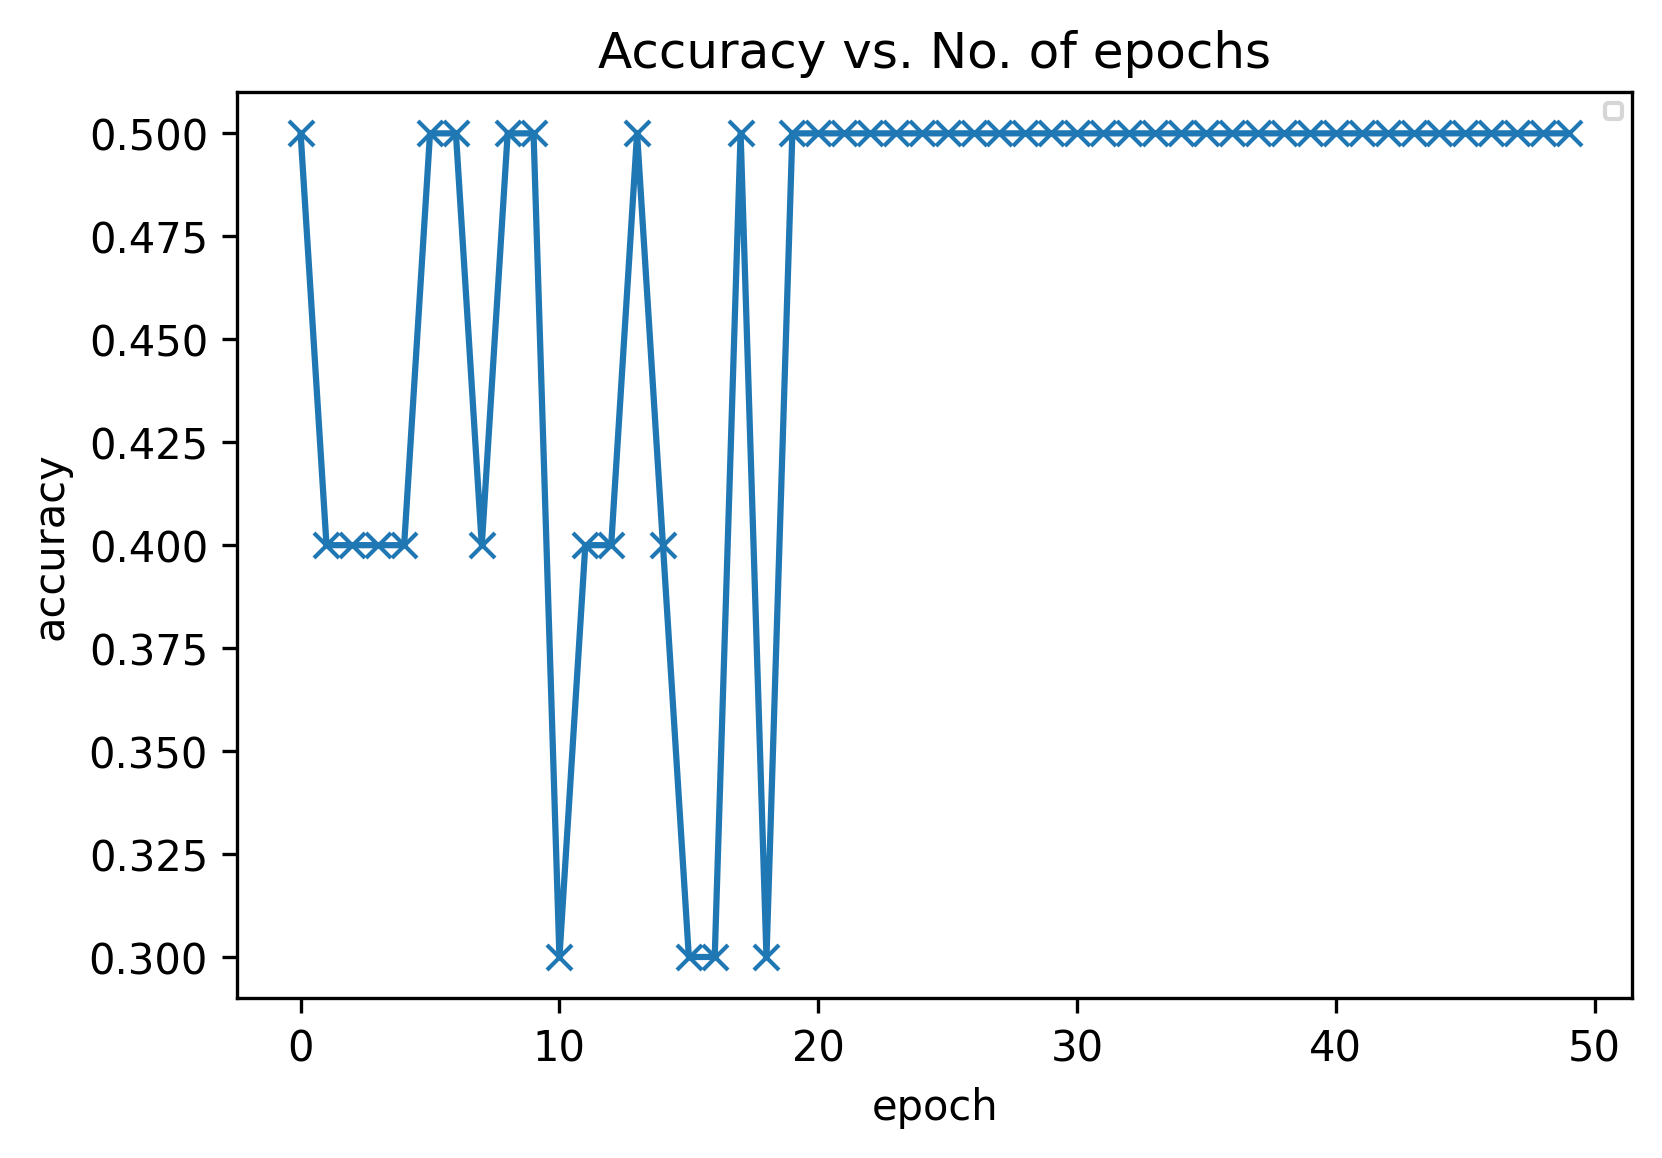

In [89]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5})

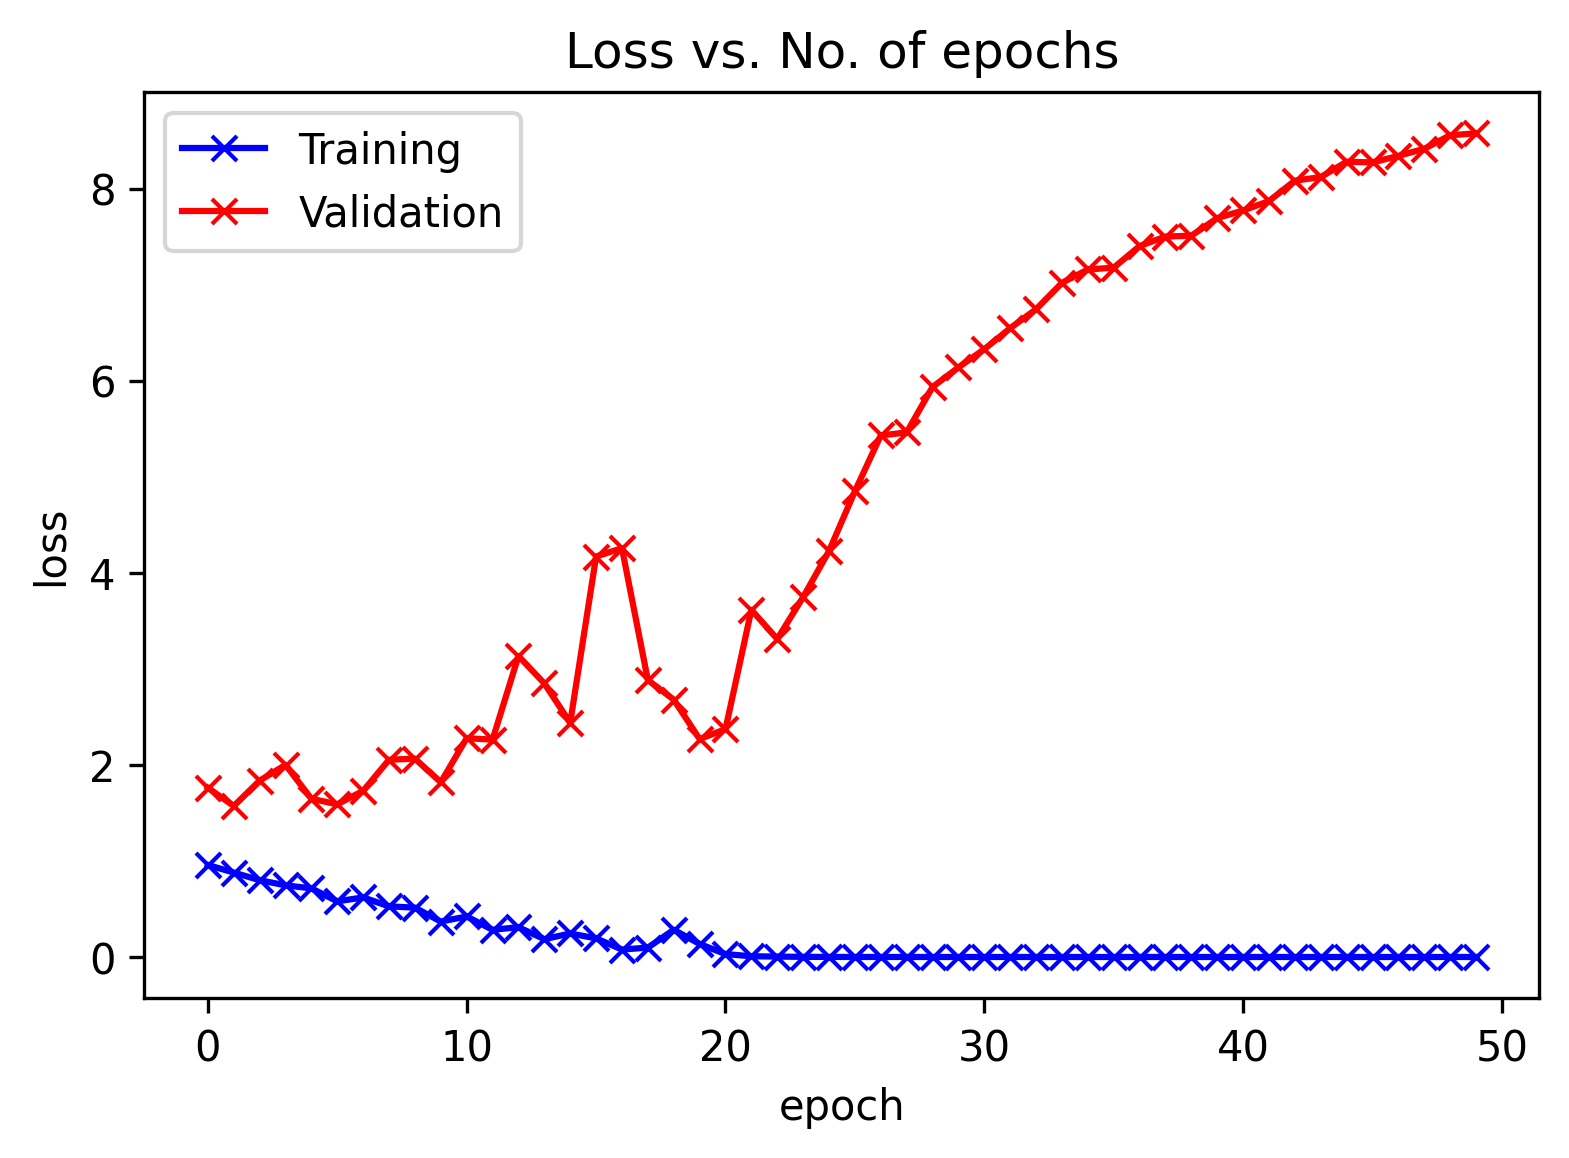

In [90]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

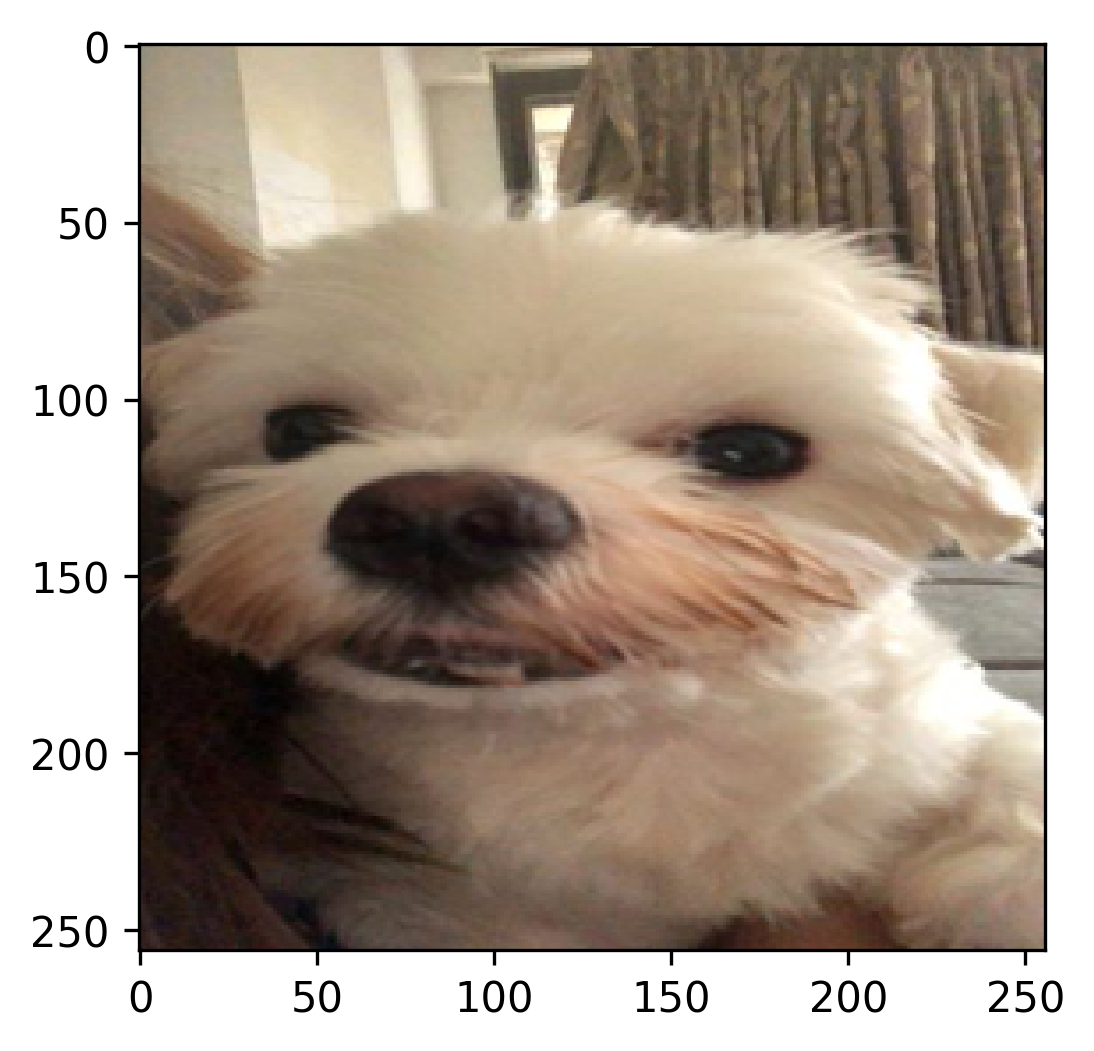

In [91]:
import torch
from PIL import Image
import numpy as np

# Load the image and resize it to 256x256
image = Image.open('/content/shi.jpeg').resize((256, 256))
# Convert the image to a tensor
tensor_test = torch.tensor(np.array(image))
# Normalize the tensor values to be between 0 and 1
tensor_test = tensor_test.float() / 255.0

# Reshape the tensor to have a batch size of 1
tensor_test = tensor_test.permute(2, 0, 1).unsqueeze(0)

tensor_test.shape

plt.imshow(tensor_test[0].permute(1, 2, 0))

In [92]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: maltese_dog , Predicted: airedale


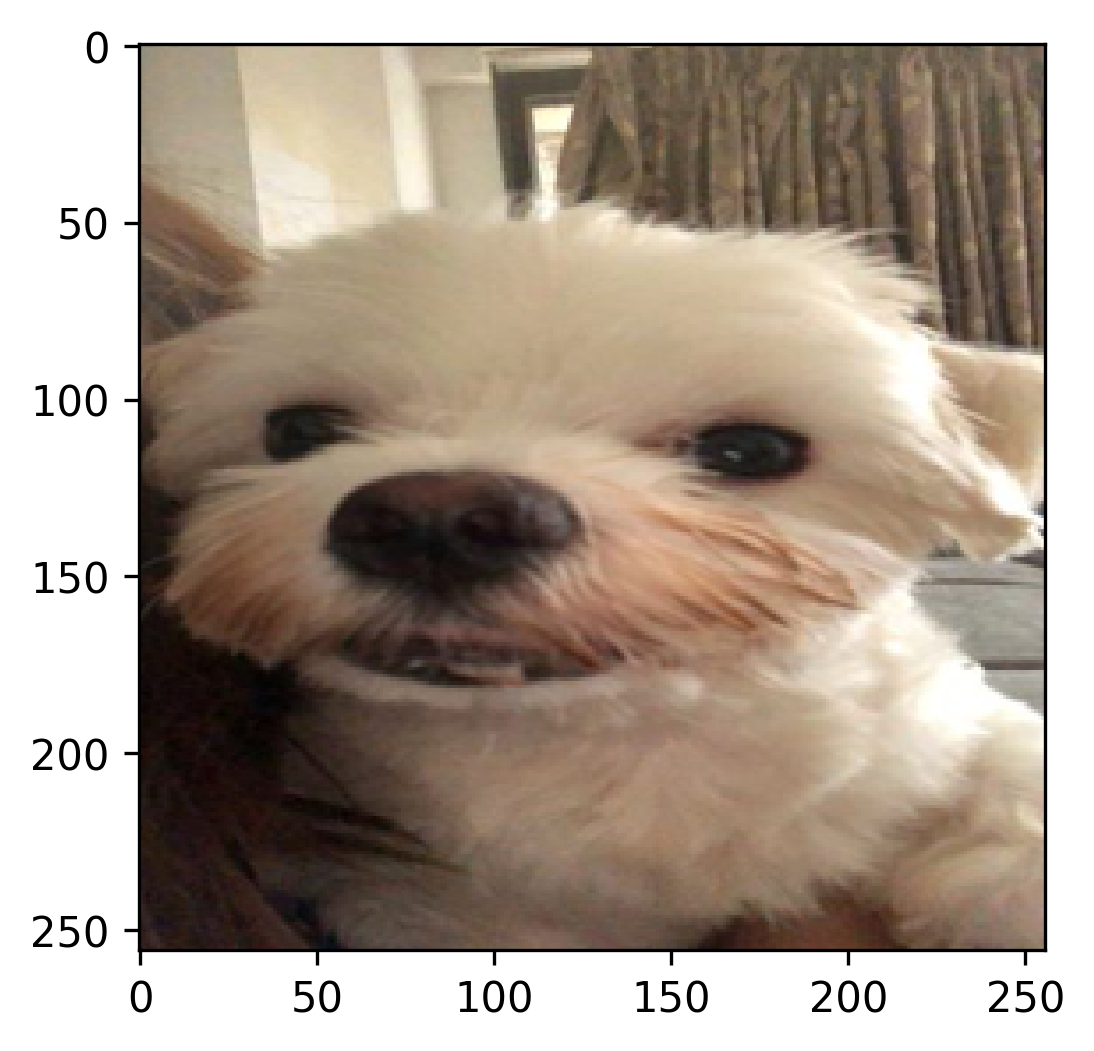

In [93]:
img = tensor_test
label = 'maltese_dog'
plt.imshow(img[0].permute(1, 2, 0))

print('Label:', 'maltese_dog' , ', Predicted:', predict_image(img[0], new_model))